In [1]:
# conda install scikit-image
import numpy as np
from skimage import img_as_float
from skimage.color import rgb2gray
import skimage.data as skid
import skimage.exposure as skie
from ipywidgets import interact
import matplotlib.pyplot as plt

In [2]:
# add a test image
chelsea=skid.chelsea()
chelsea.shape, chelsea.dtype

((300, 451, 3), dtype('uint8'))

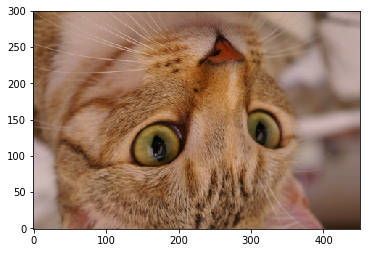

In [3]:
plt.imshow(chelsea, origin='lower')

In [4]:
img=rgb2gray(chelsea)
img.shape, img.dtype

((300, 451), dtype('float64'))

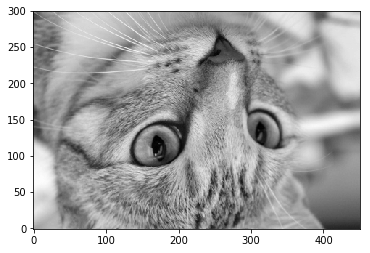

In [5]:
plt.imshow(img, origin='lower', cmap='gray')

### begin processing

In [6]:
p2, p98=np.percentile(img, (2, 98))

In [7]:
img_rescale=skie.rescale_intensity(img, in_range=(p2, p98))
img_eq = skie.equalize_hist(img)
img_adapteq = img_as_float(skie.equalize_adapthist(img, clip_limit=0.03))

C:\ProgramData\Miniconda3\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [8]:
hist_types = dict([('Contrast stretching', img_rescale),
                   ('Histogram equalization', img_eq),
                   ('Adaptive equalization', img_adapteq)])

In [9]:
@interact(hist_type=list(hist_types.keys()))
def display_result(hist_type):
    result = hist_types[hist_type]

    # We display the processed grayscale image on the left.
    plt.subplot(121)
    plt.imshow(result, cmap='gray', origin='lower')
    plt.axis('off')

    # We display the histogram on the right.
    plt.subplot(122)
    # ravel() flattern an array
    plt.hist(result.ravel(), bins=np.linspace(0., 1., 256),histtype='step', color='black')
    plt.show()

interactive(children=(Dropdown(description='hist_type', options=('Contrast stretching', 'Histogram equalizatio…